In [7]:
!pip install missingno

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as msno
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder, StandardScaler , OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.linear_model import Ridge,Lasso
from sklearn.metrics import mean_squared_error, r2_score

In [13]:
df = pd.read_csv(r'C:\Users\dell\Desktop\MyDocs\Docs\MK\london_houses.csv')

In [15]:
df.head()

,Address,Neighborhood,Bedrooms,Bathrooms,Square Meters,Building Age,Garden,Garage,Floors,Property Type,Heating Type,Balcony,Interior Style,View,Materials,Building Status,Price (£)
0,78 Regent Street,Notting Hill,2,3,179,72,No,No,3,Semi-Detached,Electric Heating,High-level Balcony,Industrial,Garden,Marble,Renovated,2291200
1,198 Oxford Street,Westminster,2,1,123,34,Yes,No,1,Apartment,Central Heating,High-level Balcony,Industrial,City,Laminate Flooring,Old,1476000
2,18 Regent Street,Soho,5,3,168,38,No,Yes,3,Semi-Detached,Central Heating,No Balcony,Industrial,Street,Wood,Renovated,1881600
3,39 Piccadilly Circus,Islington,5,1,237,53,Yes,Yes,1,Apartment,Underfloor Heating,No Balcony,Classic,Park,Granite,Renovated,1896000
4,116 Fleet Street,Marylebone,4,1,127,23,No,Yes,2,Semi-Detached,Central Heating,No Balcony,Modern,Park,Wood,Old,1524000


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Address          1000 non-null   object
 1   Neighborhood     1000 non-null   object
 2   Bedrooms         1000 non-null   int64 
 3   Bathrooms        1000 non-null   int64 
 4   Square Meters    1000 non-null   int64 
 5   Building Age     1000 non-null   int64 
 6   Garden           1000 non-null   object
 7   Garage           1000 non-null   object
 8   Floors           1000 non-null   int64 
 9   Property Type    1000 non-null   object
 10  Heating Type     1000 non-null   object
 11  Balcony          1000 non-null   object
 12  Interior Style   1000 non-null   object
 13  View             1000 non-null   object
 14  Materials        1000 non-null   object
 15  Building Status  1000 non-null   object
 16  Price (£)        1000 non-null   int64 
dtypes: int64(6), object(11)
memory usa

In [19]:
df.shape

(1000, 17)

In [21]:
df.describe()

,Bedrooms,Bathrooms,Square Meters,Building Age,Floors,Price (£)
count,1000.000000,1000.000000,1000.0000,1000.00000,1000.000000,1.000000e+03
mean,3.013000,2.003000,149.6270,49.96500,1.991000,1.840807e+06
std,1.393834,0.808483,58.0562,29.07086,0.821946,8.793484e+05
min,1.000000,1.000000,50.0000,1.00000,1.000000,3.866660e+05
25%,2.000000,1.000000,99.0000,24.00000,1.000000,1.161400e+06
50%,3.000000,2.000000,148.0000,50.00000,2.000000,1.721999e+06
75%,4.000000,3.000000,201.0000,76.00000,3.000000,2.390500e+06
max,5.000000,3.000000,249.0000,99.00000,3.000000,4.980000e+06


In [23]:
df.isnull().sum()

Address            0
Neighborhood       0
Bedrooms           0
Bathrooms          0
Square Meters      0
Building Age       0
Garden             0
Garage             0
Floors             0
Property Type      0
Heating Type       0
Balcony            0
Interior Style     0
View               0
Materials          0
Building Status    0
Price (£)          0
dtype: int64

<Axes: >

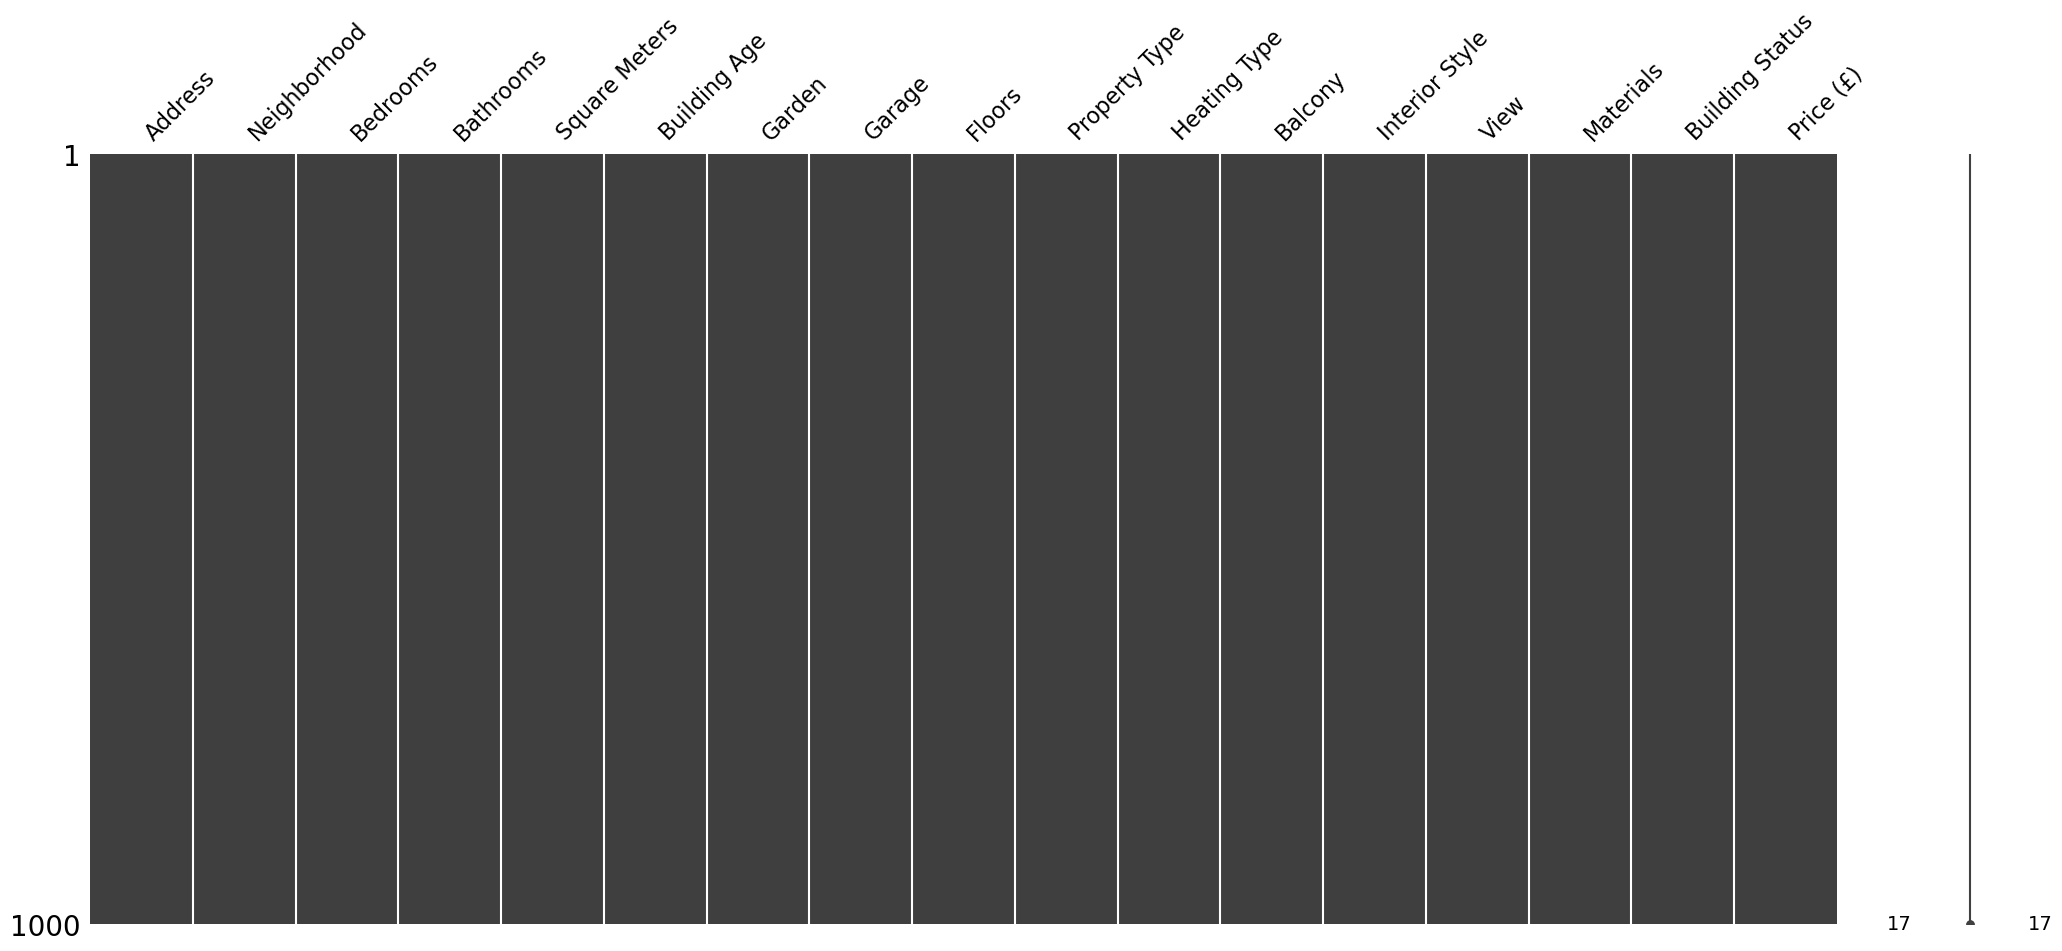

In [25]:
msno.matrix(df)

In [27]:
df.duplicated().sum()

0

In [29]:
num_cols = df.select_dtypes(include=np.number).columns
cat_cols = df.select_dtypes(exclude=np.number).columns

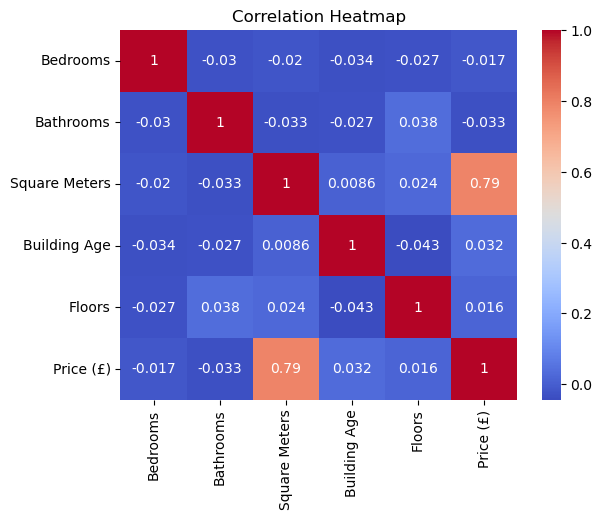

In [31]:
sns.heatmap(df[num_cols].corr(), cmap='coolwarm',annot=True)
plt.title('Correlation Heatmap')
plt.show()

In [33]:
for col in cat_cols:
  if col != 'Address':
    print(f'{col} : {df[col].unique()}')

Neighborhood : ['Notting Hill' 'Westminster' 'Soho' 'Islington' 'Marylebone' 'Kensington'
 'Greenwich' 'Shoreditch' 'Camden' 'Chelsea']
Garden : ['No' 'Yes']
Garage : ['No' 'Yes']
Property Type : ['Semi-Detached' 'Apartment' 'Detached House']
Heating Type : ['Electric Heating' 'Central Heating' 'Underfloor Heating' 'Gas Heating']
Balcony : ['High-level Balcony' 'No Balcony' 'Low-level Balcony']
Interior Style : ['Industrial' 'Classic' 'Modern' 'Minimalist']
View : ['Garden' 'City' 'Street' 'Park' 'Sea']
Materials : ['Marble' 'Laminate Flooring' 'Wood' 'Granite']
Building Status : ['Renovated' 'Old' 'New']


In [35]:
df['Price per Square Meter'] = df['Price (£)'] / df['Square Meters']
df['Price per Square Meter'] = df['Price per Square Meter'].astype(int)

In [37]:
def splitaddress(x):
    x = x.split(" ")
    x = x[1:]
    return " ".join(x[0:])
df.Address = df.Address.apply(splitaddress)

In [39]:
# current_year = input(" Insert the current year")  # active this step to let user choose the year needed
current_year = 2024  # Adjust this as needed
df['Age of Property'] = current_year - df['Building Age']

In [41]:
df.drop(columns=['Building Age'], inplace=True)

In [43]:
df['Total Rooms'] = df['Bedrooms'] + df['Bathrooms']

In [45]:
df.columns

Index(['Address', 'Neighborhood', 'Bedrooms', 'Bathrooms', 'Square Meters',
       'Garden', 'Garage', 'Floors', 'Property Type', 'Heating Type',
       'Balcony', 'Interior Style', 'View', 'Materials', 'Building Status',
       'Price (£)', 'Price per Square Meter', 'Age of Property',
       'Total Rooms'],
      dtype='object')

In [47]:
num_cols = df.select_dtypes(include=np.number).columns
cat_cols = df.select_dtypes(exclude=np.number).columns

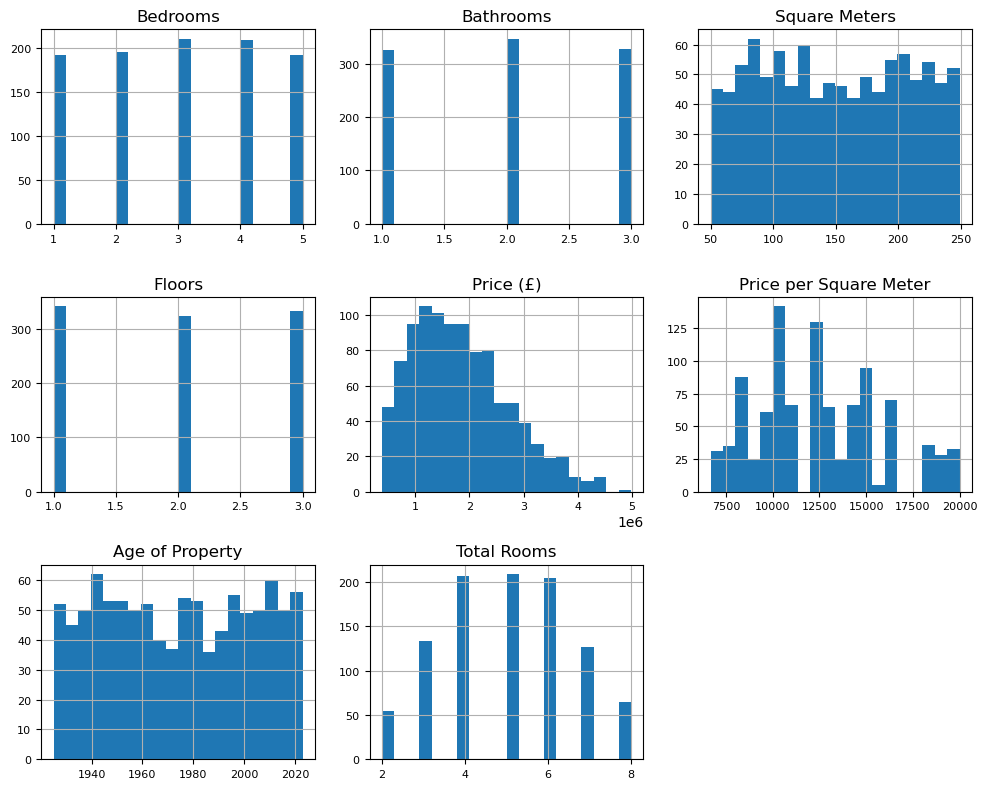

In [49]:
df[num_cols].hist(figsize=(10, 8), bins=20, xlabelsize=8, ylabelsize=8)
plt.tight_layout()
plt.xlabel('Value', fontsize=10 , rotation=45)
plt.ylabel('Frequency', fontsize=10)
plt.show()

In [51]:
df.columns

Index(['Address', 'Neighborhood', 'Bedrooms', 'Bathrooms', 'Square Meters',
       'Garden', 'Garage', 'Floors', 'Property Type', 'Heating Type',
       'Balcony', 'Interior Style', 'View', 'Materials', 'Building Status',
       'Price (£)', 'Price per Square Meter', 'Age of Property',
       'Total Rooms'],
      dtype='object')

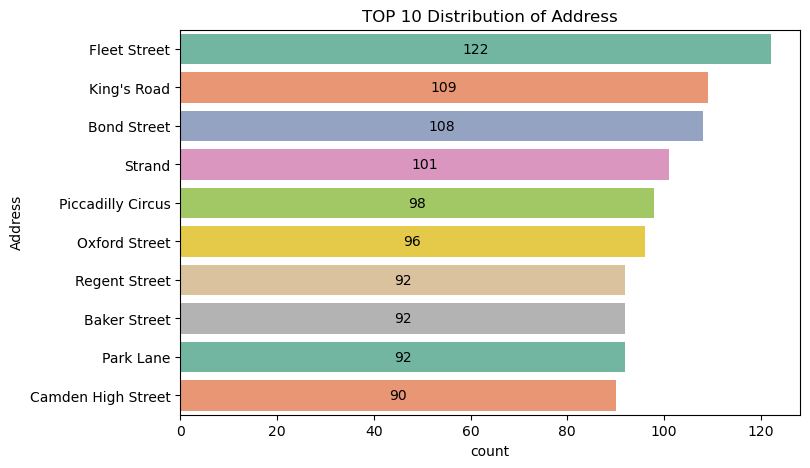

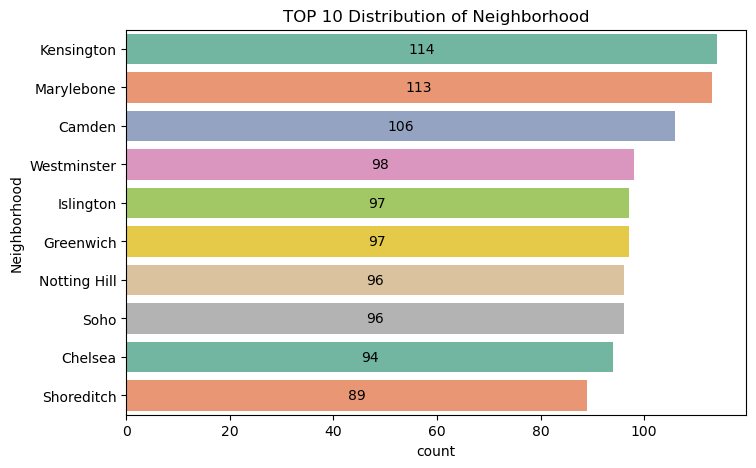

In [53]:
for col in cat_cols :
  if col in ['Address','Neighborhood']:
    plt.figure(figsize=(8,5))
    count_prim = df[col].value_counts().head(10)
    ax = sns.barplot(y=count_prim.index, x=count_prim.values, palette="Set2")
    plt.title("TOP 10 Distribution of " + col)
    plt.ylabel(col)
    plt.xlabel("count")

    for p in ax.patches:
      width = p.get_width()
      ax.text(width / 2,
            p.get_y() + p.get_height() / 2,
            '{:1.0f}'.format(width),
            ha="center",
            va="center")

    plt.show()

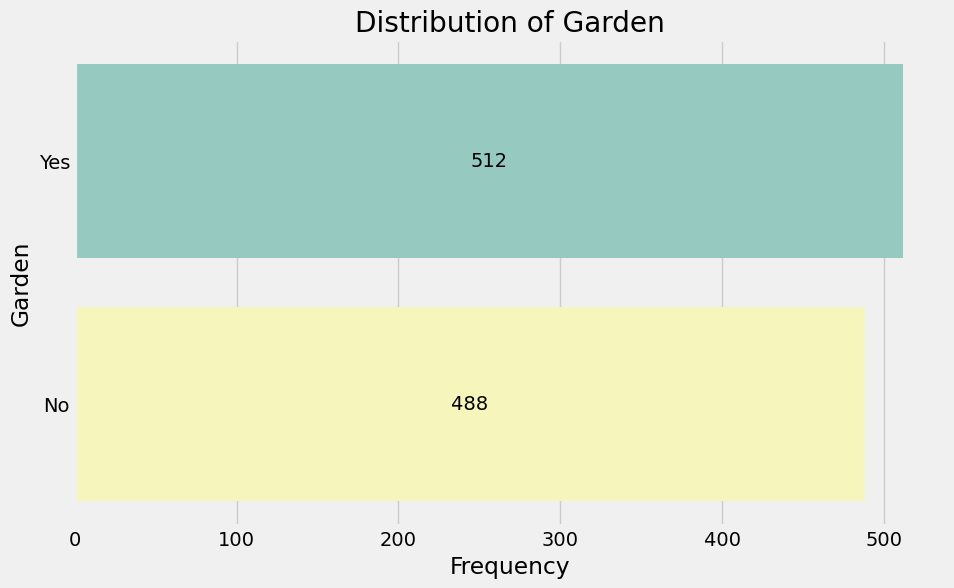

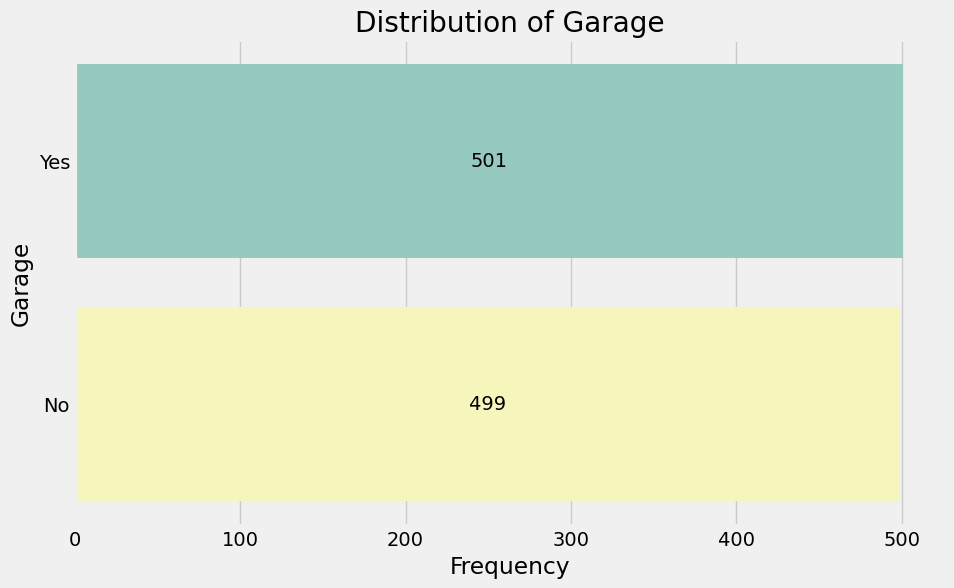

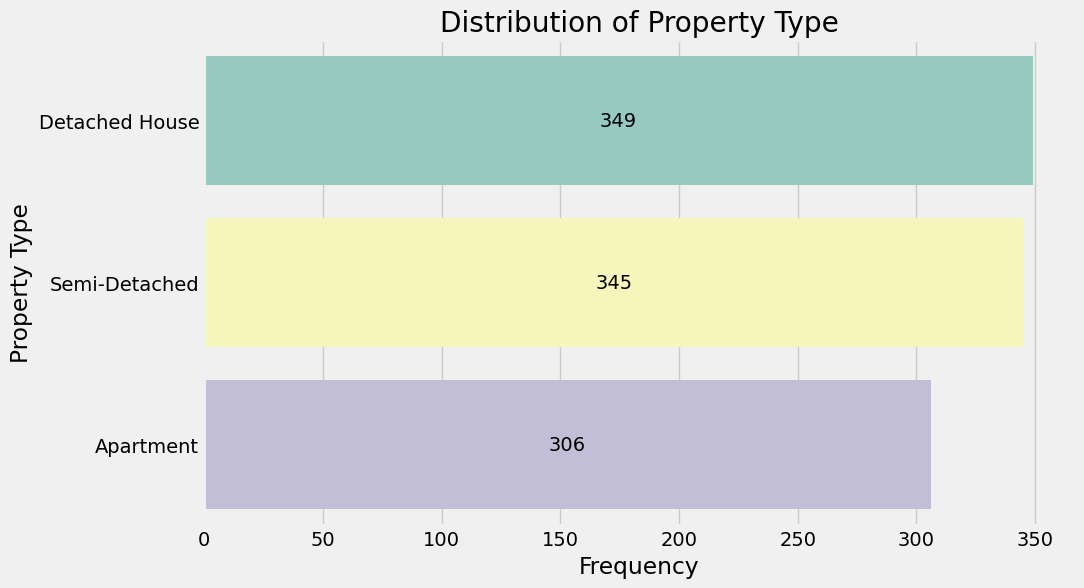

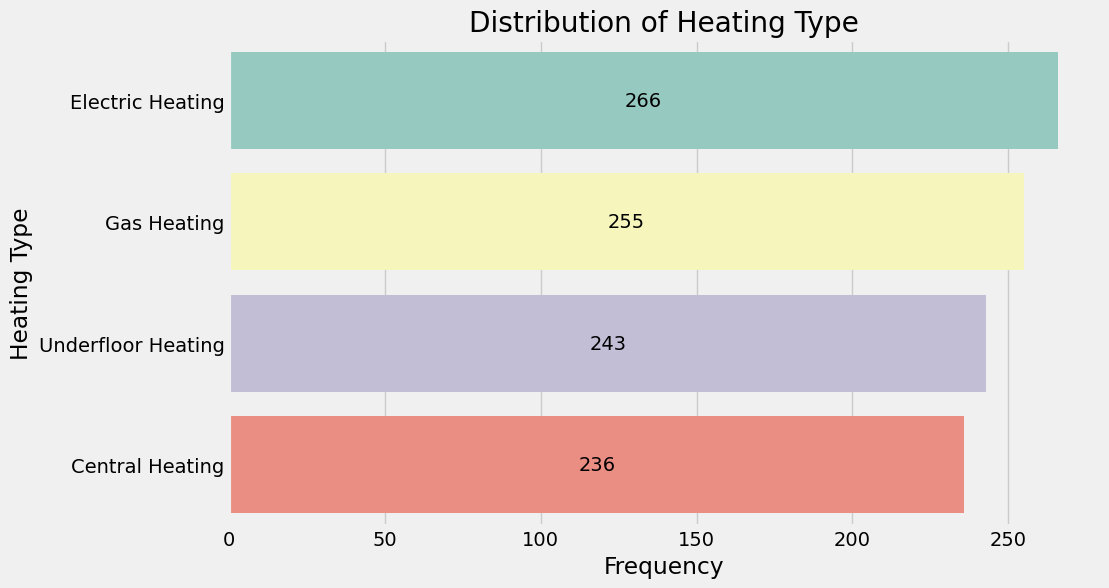

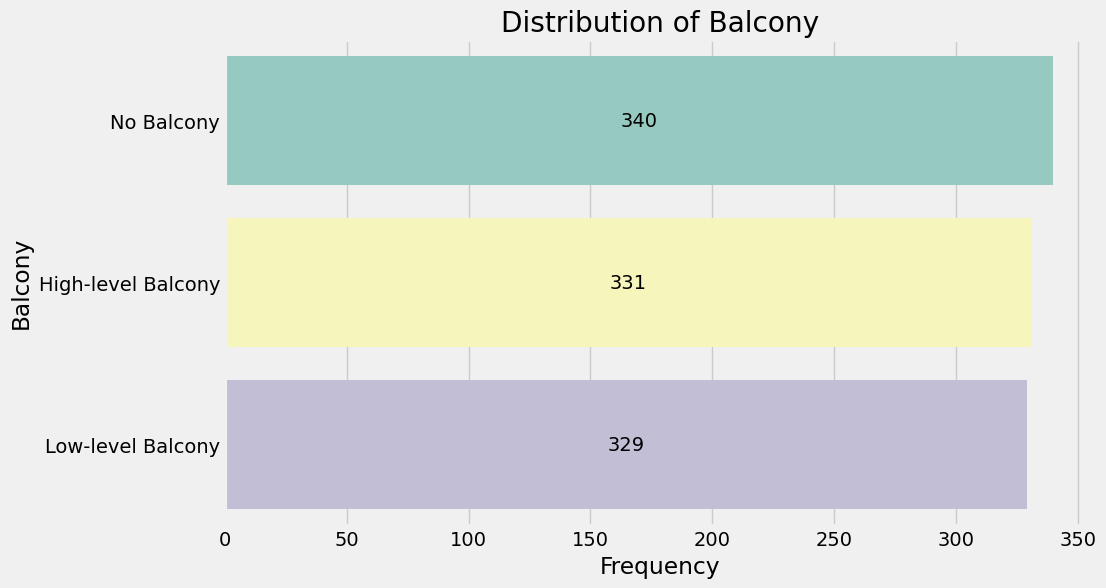

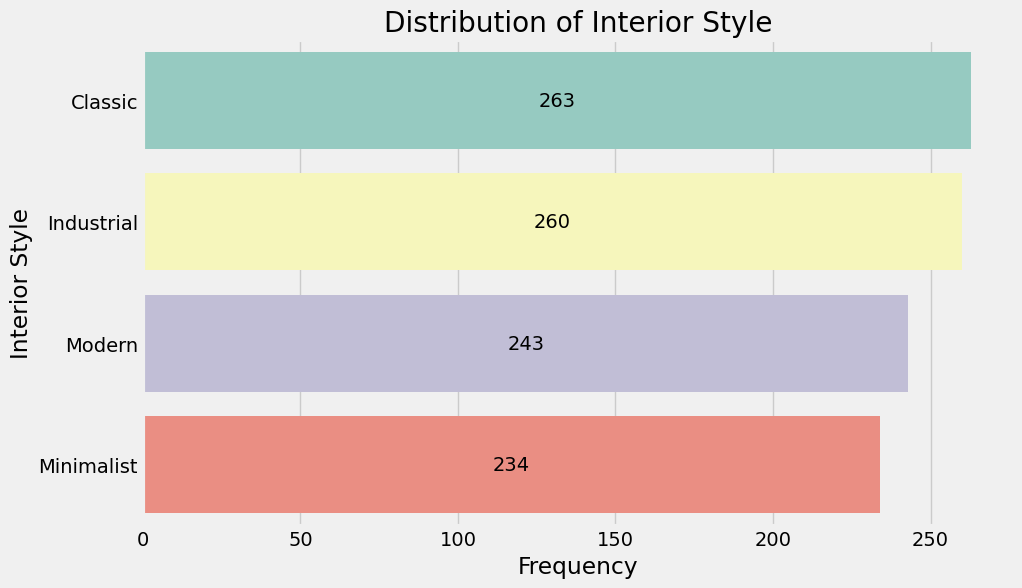

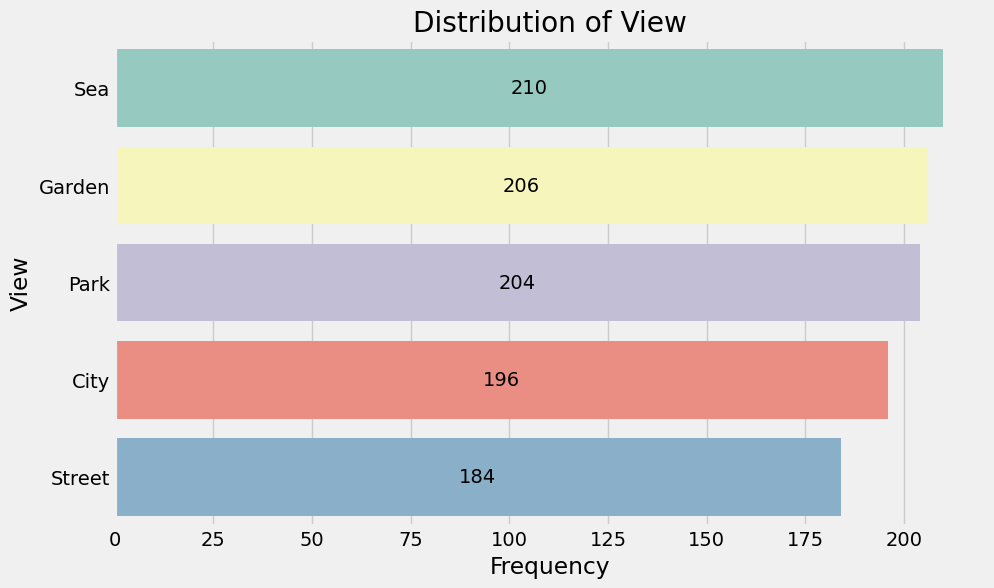

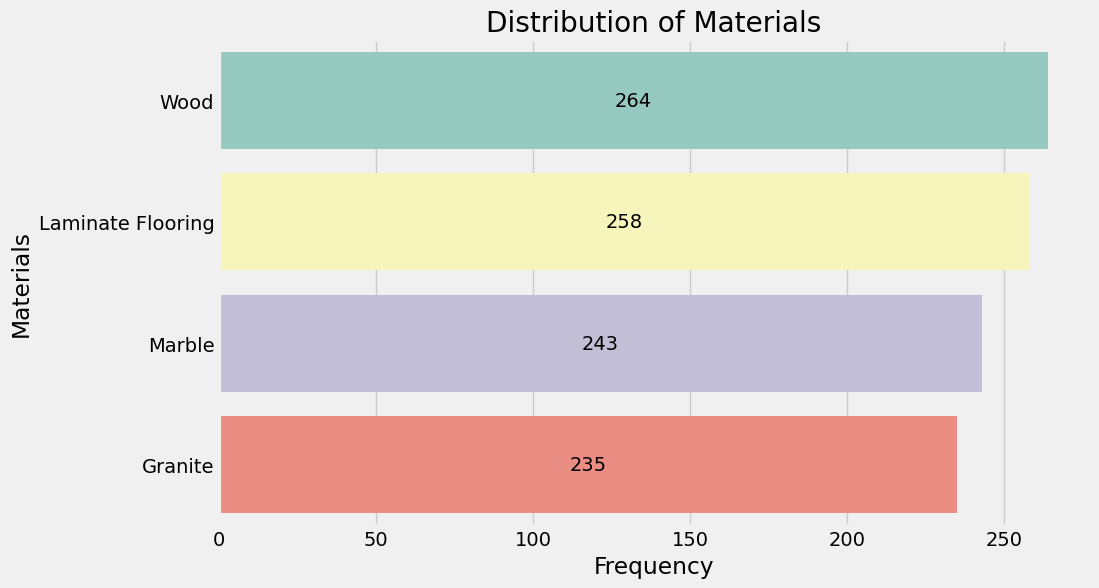

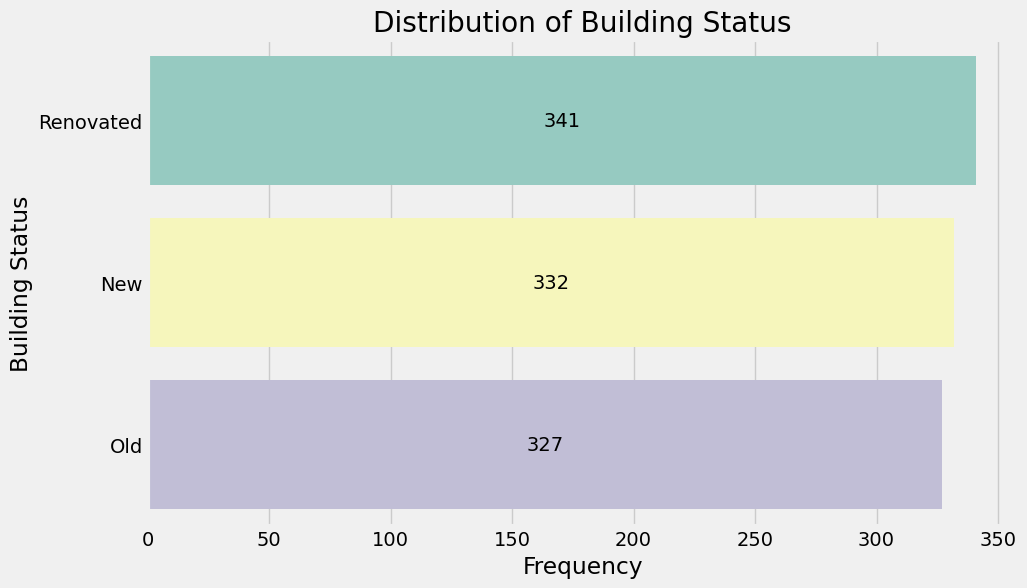

In [55]:
for col in cat_cols :
  if col not in ['Address','Neighborhood']:
    plt.style.use("fivethirtyeight")
    plt.figure(figsize=(10,6))
    count_prim = df[col].value_counts()
    ax = sns.barplot(y=count_prim.index, x=count_prim.values, palette="Set3")
    plt.title(f'Distribution of {col}')
    plt.ylabel(col)
    plt.xlabel('Frequency')

    for p in ax.patches:
      width = p.get_width()
      ax.text(width / 2,
            p.get_y() + p.get_height() / 2,
            '{:1.0f}'.format(width),
            ha="center",
            va="center")

    plt.show()

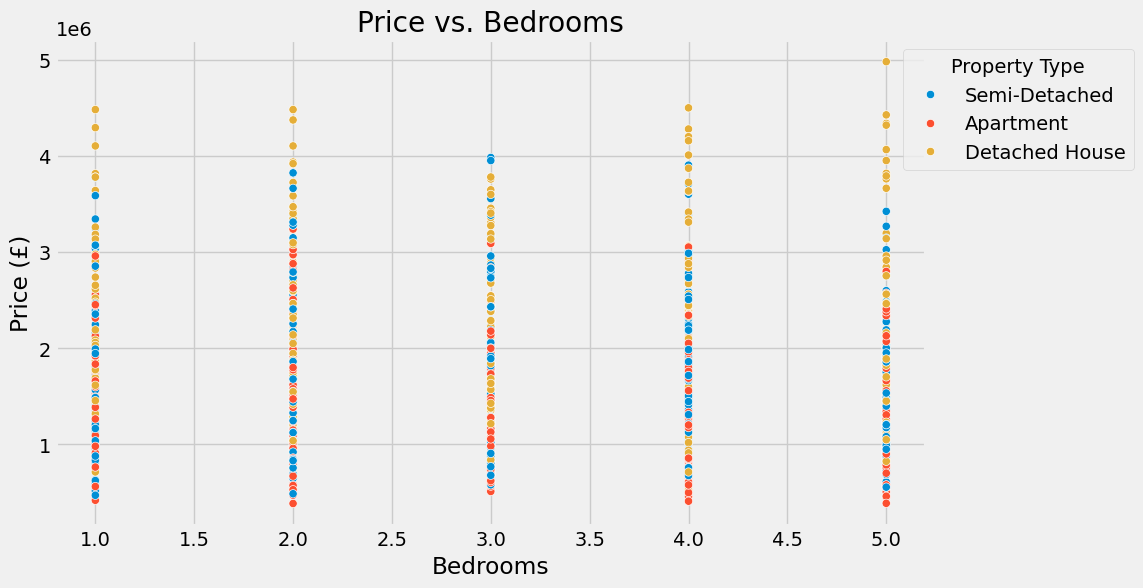

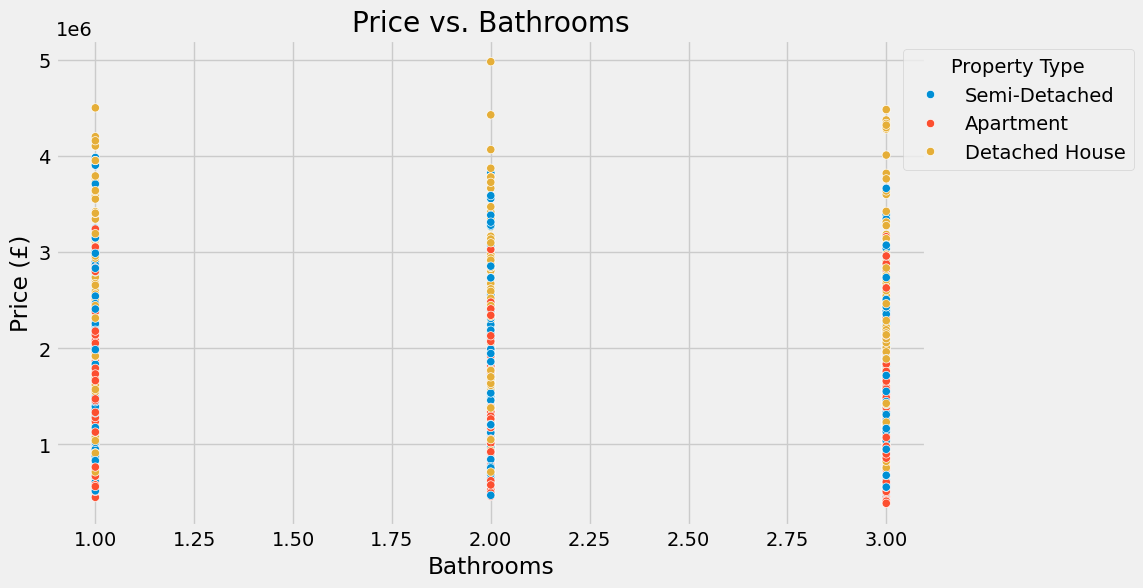

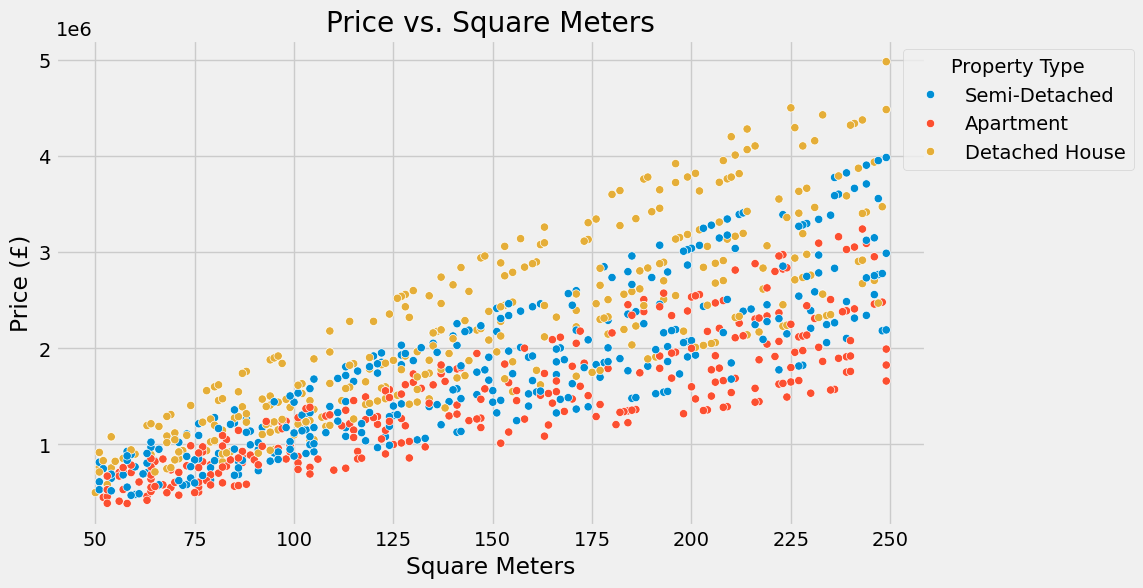

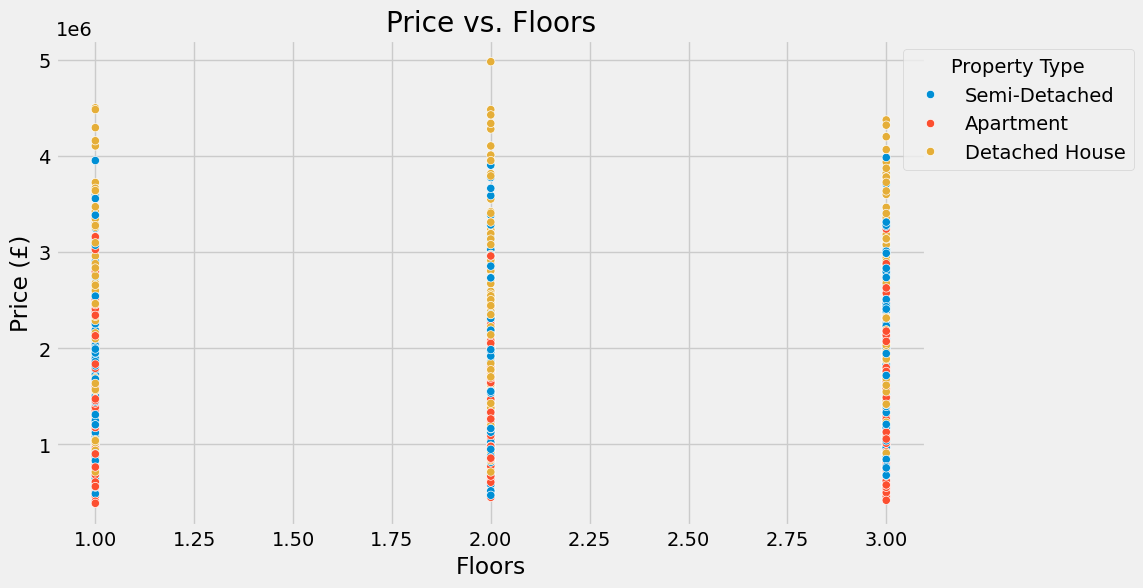

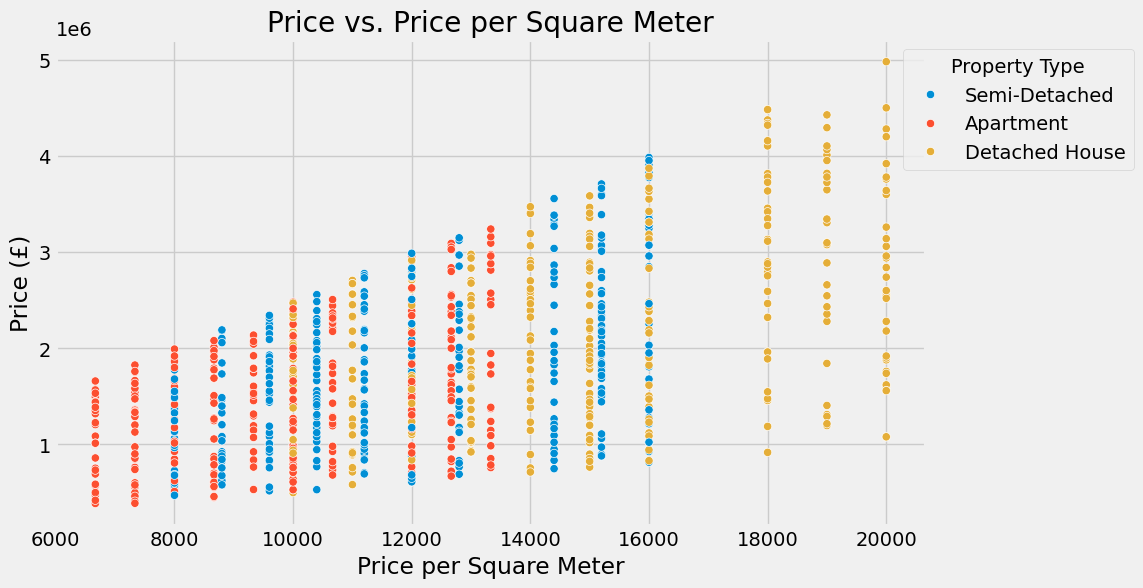

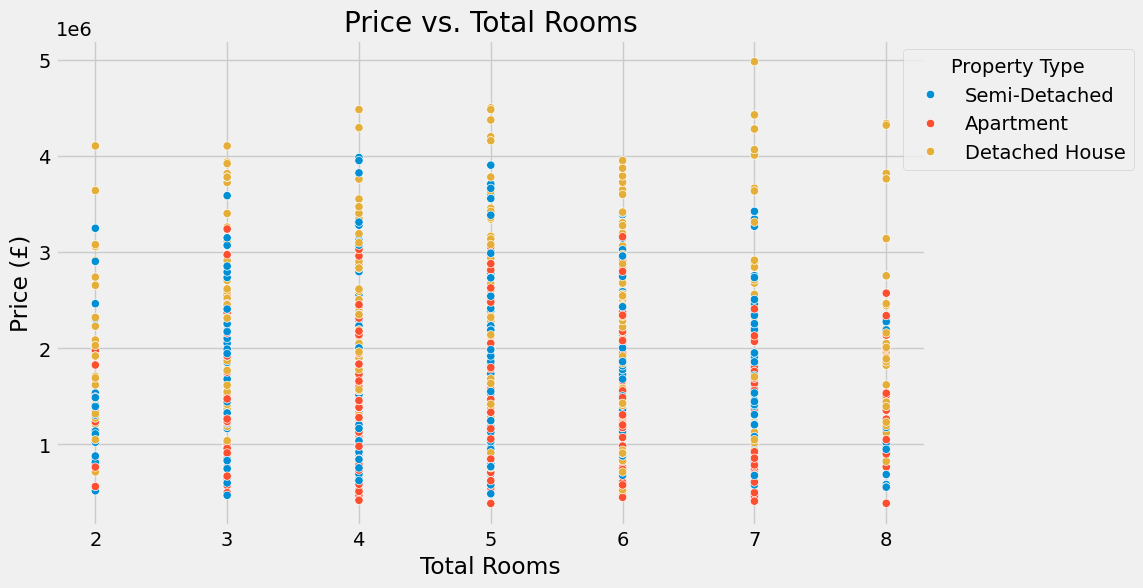

In [57]:
for col in num_cols :
  if col not in ['Price (£)','Age of Property']:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x=col, y='Price (£)', hue='Property Type')
    plt.title(f'Price vs. {col}')
    plt.legend(title='Property Type', loc='upper right',bbox_to_anchor=(1.25, 1))
    plt.xlabel(col)
    plt.ylabel('Price (£)')
    plt.show()

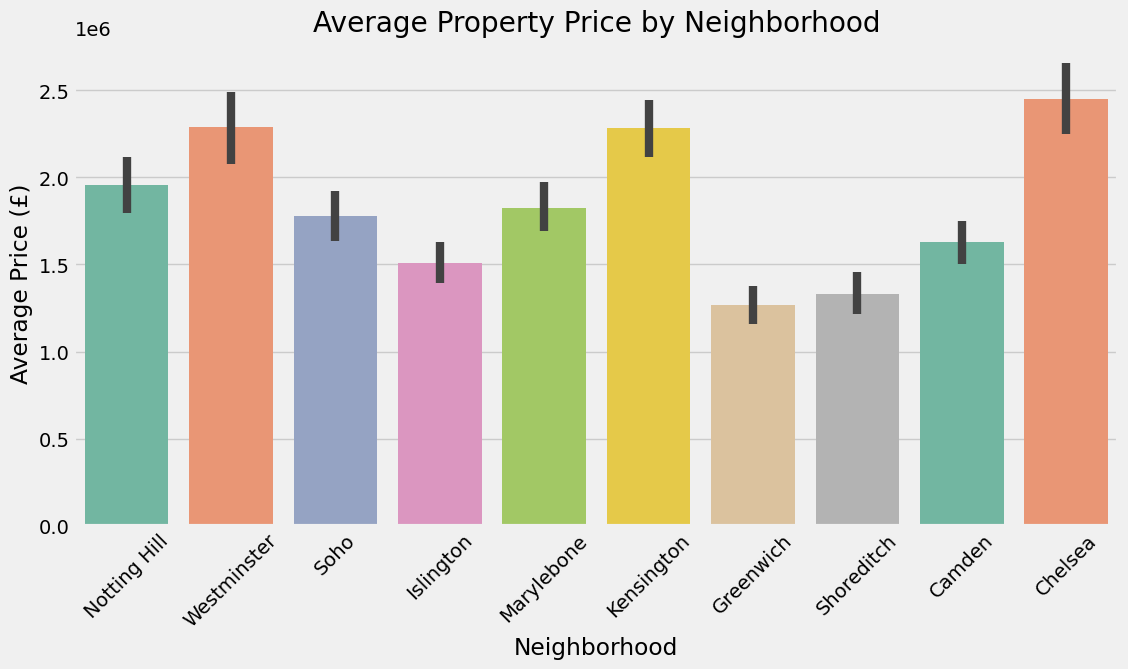

In [59]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Neighborhood', y='Price (£)', estimator=np.mean, palette='Set2')
plt.title('Average Property Price by Neighborhood')
plt.ylabel('Average Price (£)')
plt.xlabel('Neighborhood')
plt.xticks(rotation=45)
plt.show()

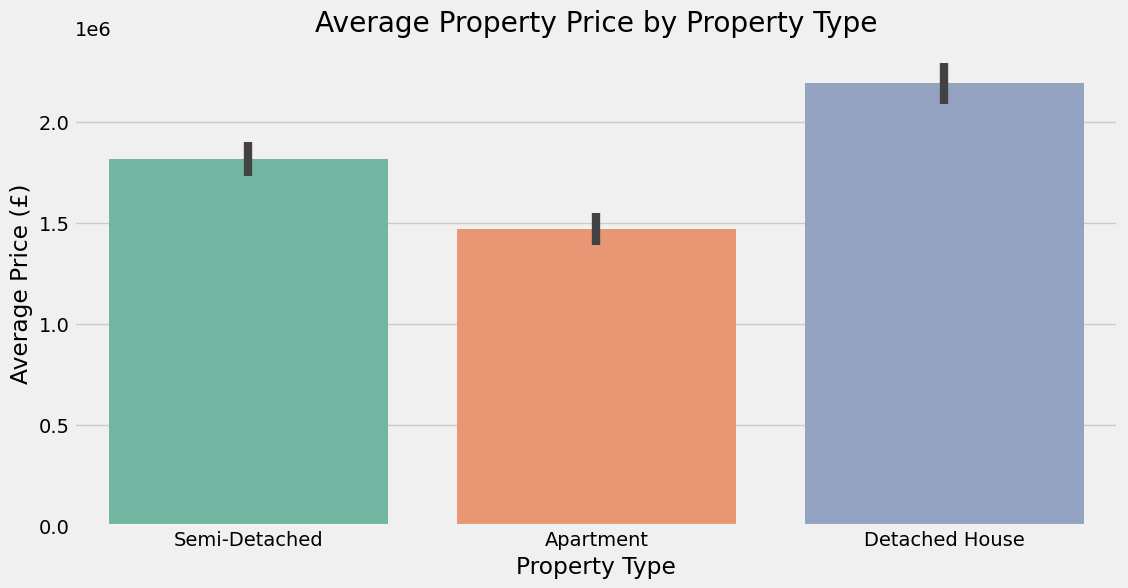

In [61]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Property Type', y='Price (£)', estimator=np.mean, palette='Set2')
plt.title('Average Property Price by Property Type')
plt.ylabel('Average Price (£)')
plt.xlabel('Property Type')
plt.show()

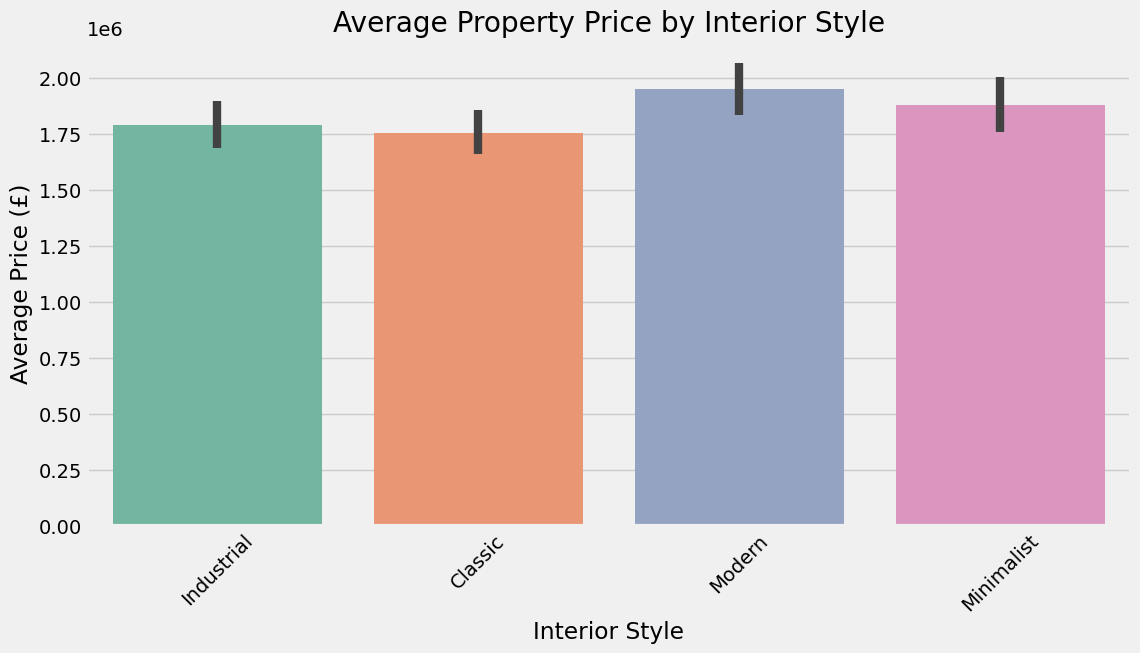

In [63]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Interior Style', y='Price (£)', estimator=np.mean, palette='Set2')
plt.title('Average Property Price by Interior Style')
plt.ylabel('Average Price (£)')
plt.xlabel('Interior Style')
plt.xticks(rotation=45)
plt.show()

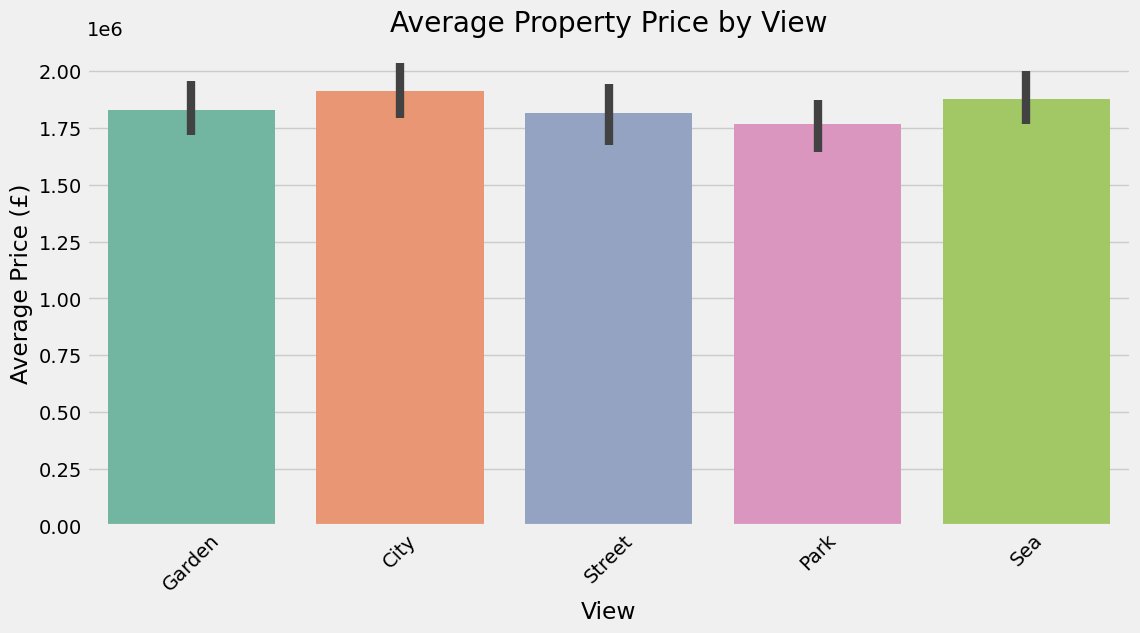

In [65]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='View', y='Price (£)', estimator=np.mean, palette='Set2')
plt.title('Average Property Price by View')
plt.ylabel('Average Price (£)')
plt.xlabel('View')
plt.xticks(rotation=45)
plt.show()

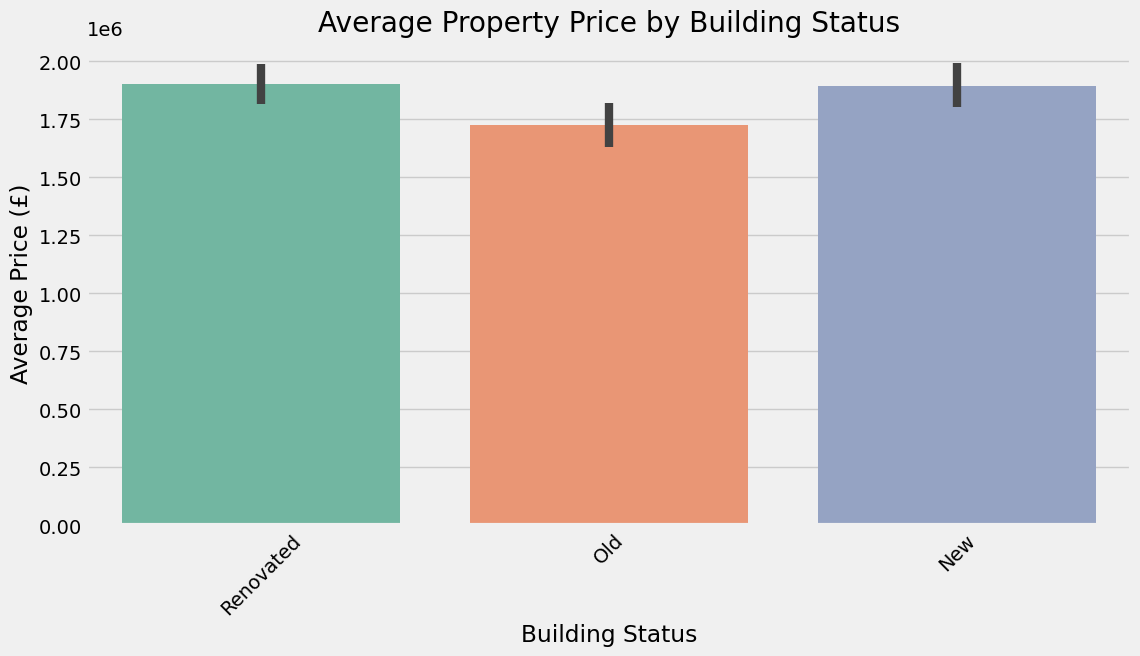

In [67]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Building Status', y='Price (£)', estimator=np.mean, palette='Set2')
plt.title('Average Property Price by Building Status')
plt.ylabel('Average Price (£)')
plt.xlabel('Building Status')
plt.xticks(rotation=45)
plt.show()

Text(0.5, 0, 'Heating Type')

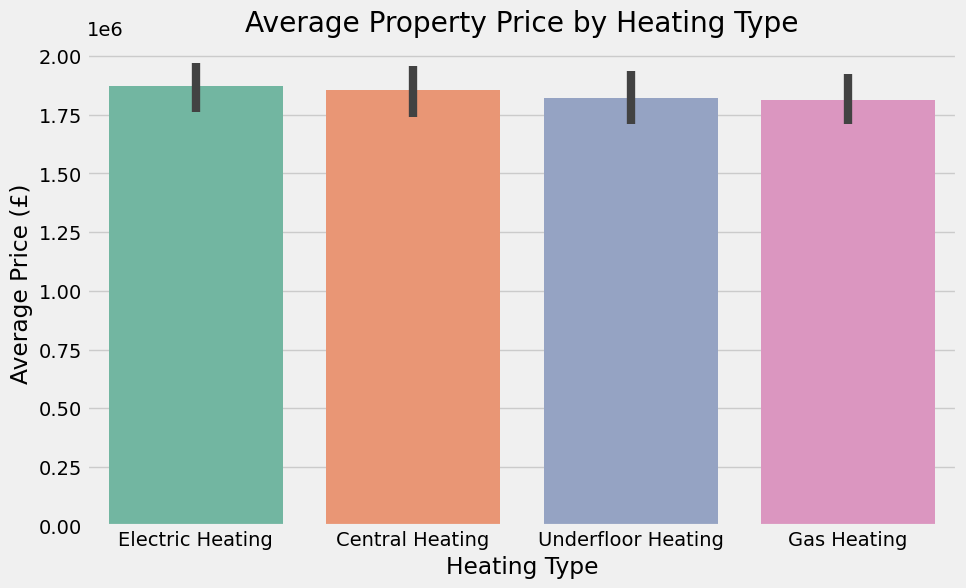

In [69]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Heating Type', y='Price (£)', estimator=np.mean, palette='Set2')
plt.title('Average Property Price by Heating Type')
plt.ylabel('Average Price (£)')
plt.xlabel('Heating Type')

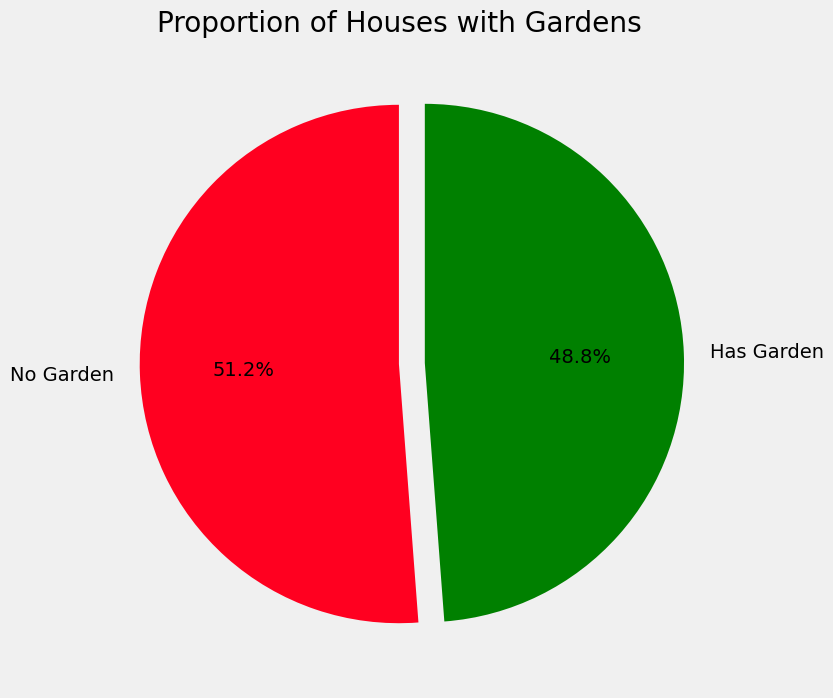

In [71]:
Garden_counts = df['Garden'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(Garden_counts, labels=['No Garden', 'Has Garden'], autopct='%1.1f%%', startangle=90 ,colors=['#FF0020', '#008000FF'] , explode=(0,0.1))
plt.title('Proportion of Houses with Gardens')
plt.show()

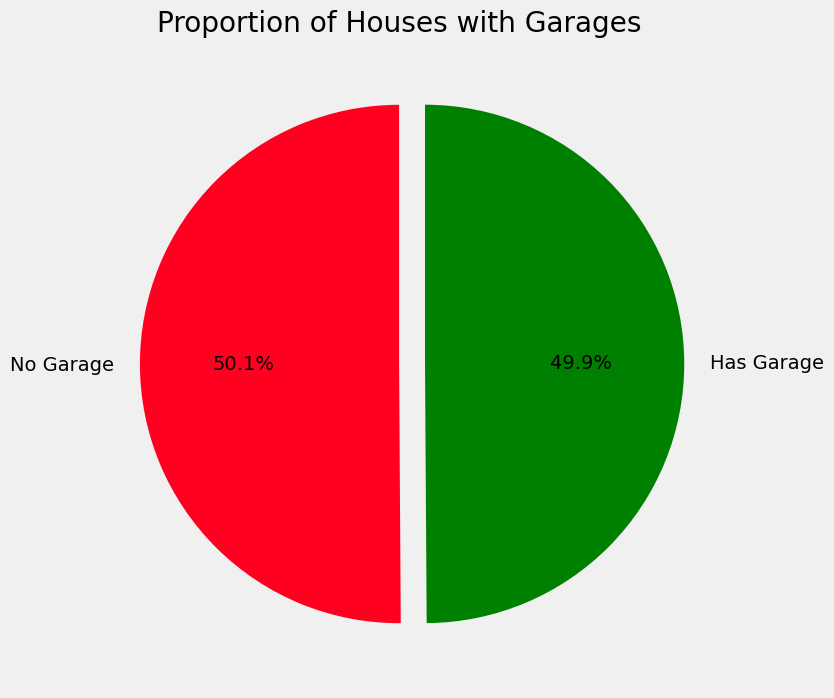

In [73]:
Garage_counts = df['Garage'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(Garage_counts, labels=['No Garage', 'Has Garage'], autopct='%1.1f%%', startangle=90 ,colors=['#FF0020', '#008000FF'] , explode=(0,0.1))
plt.title('Proportion of Houses with Garages')
plt.show()

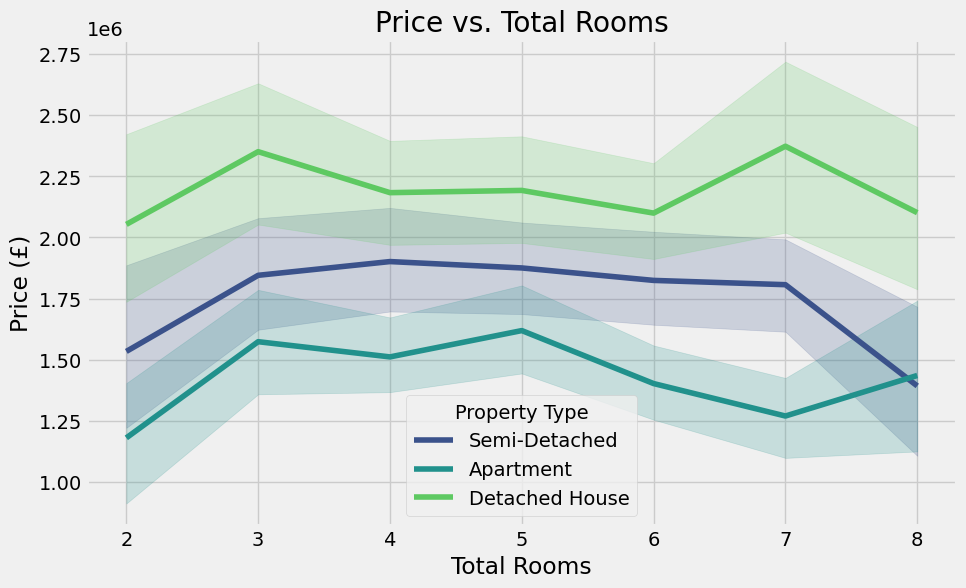

In [75]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Total Rooms', y='Price (£)', palette='viridis', hue='Property Type')
plt.title('Price vs. Total Rooms')
plt.xlabel('Total Rooms')
plt.ylabel('Price (£)')
plt.show()

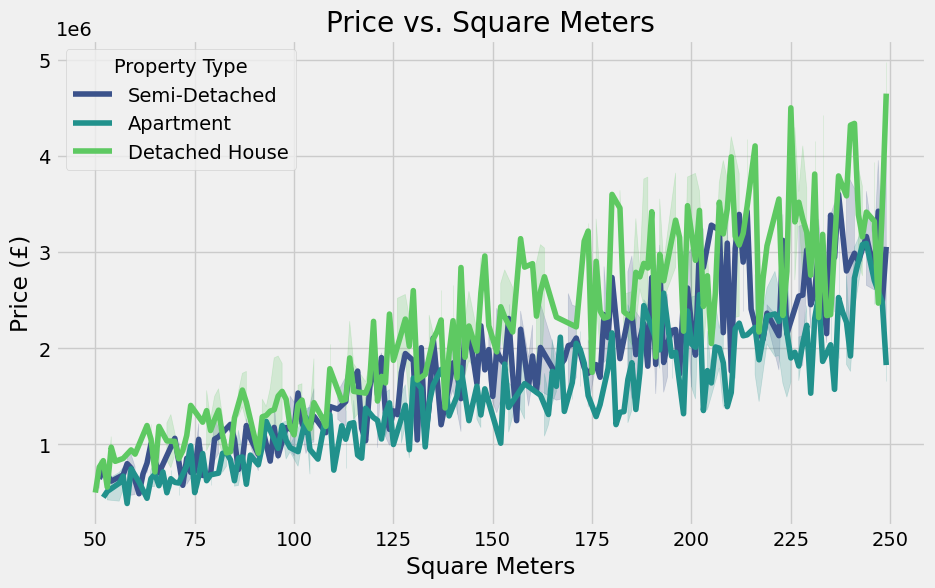

In [77]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Square Meters', y='Price (£)', palette='viridis', hue='Property Type')
plt.title('Price vs. Square Meters')
plt.xlabel('Square Meters')
plt.ylabel('Price (£)')
plt.show()

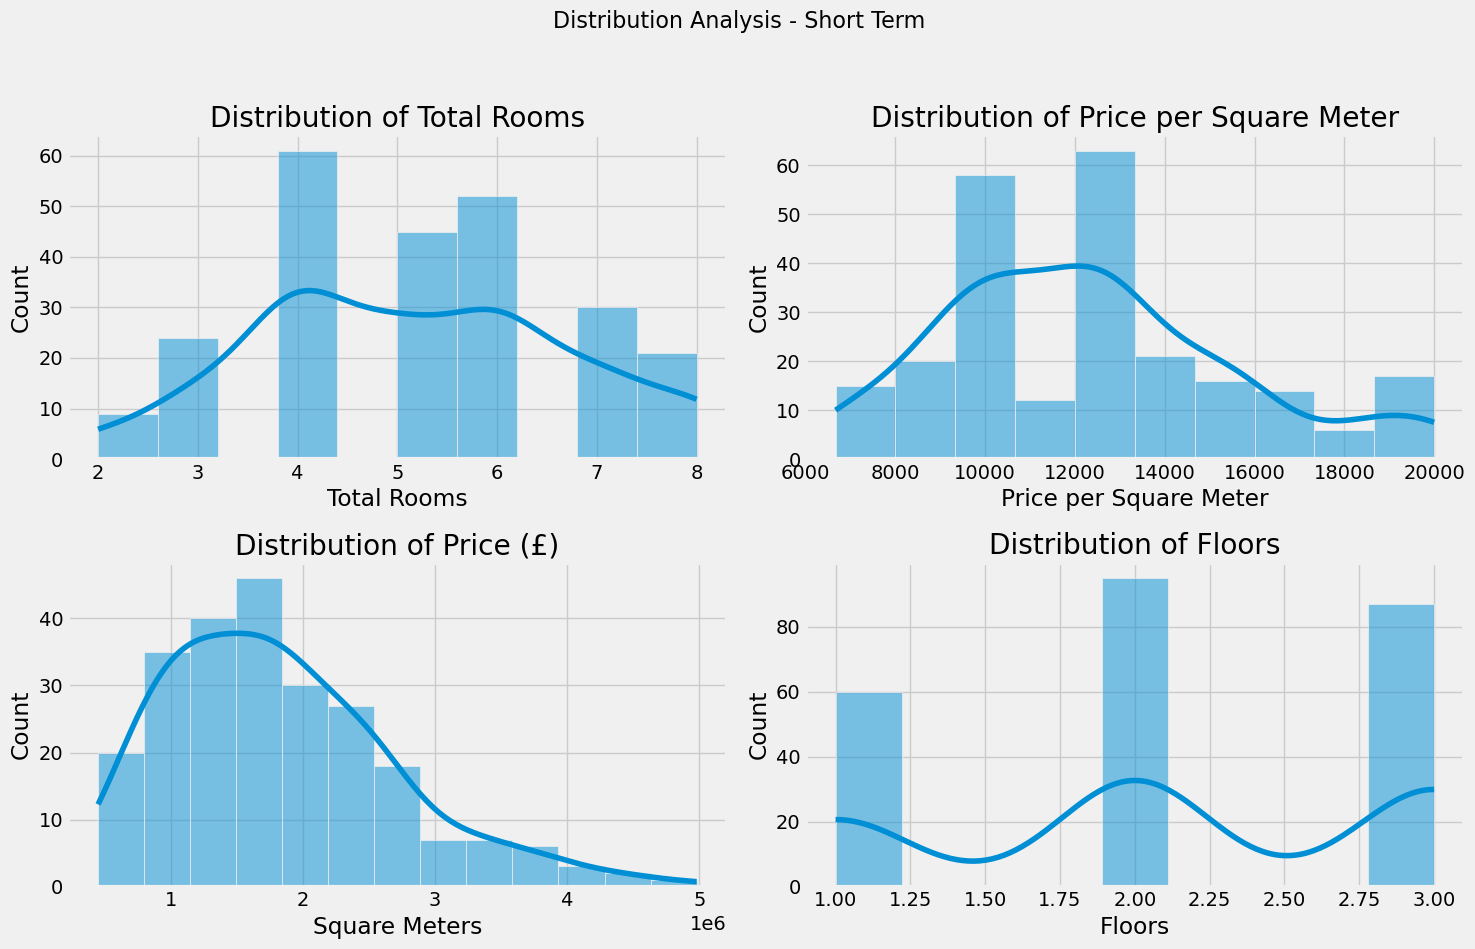

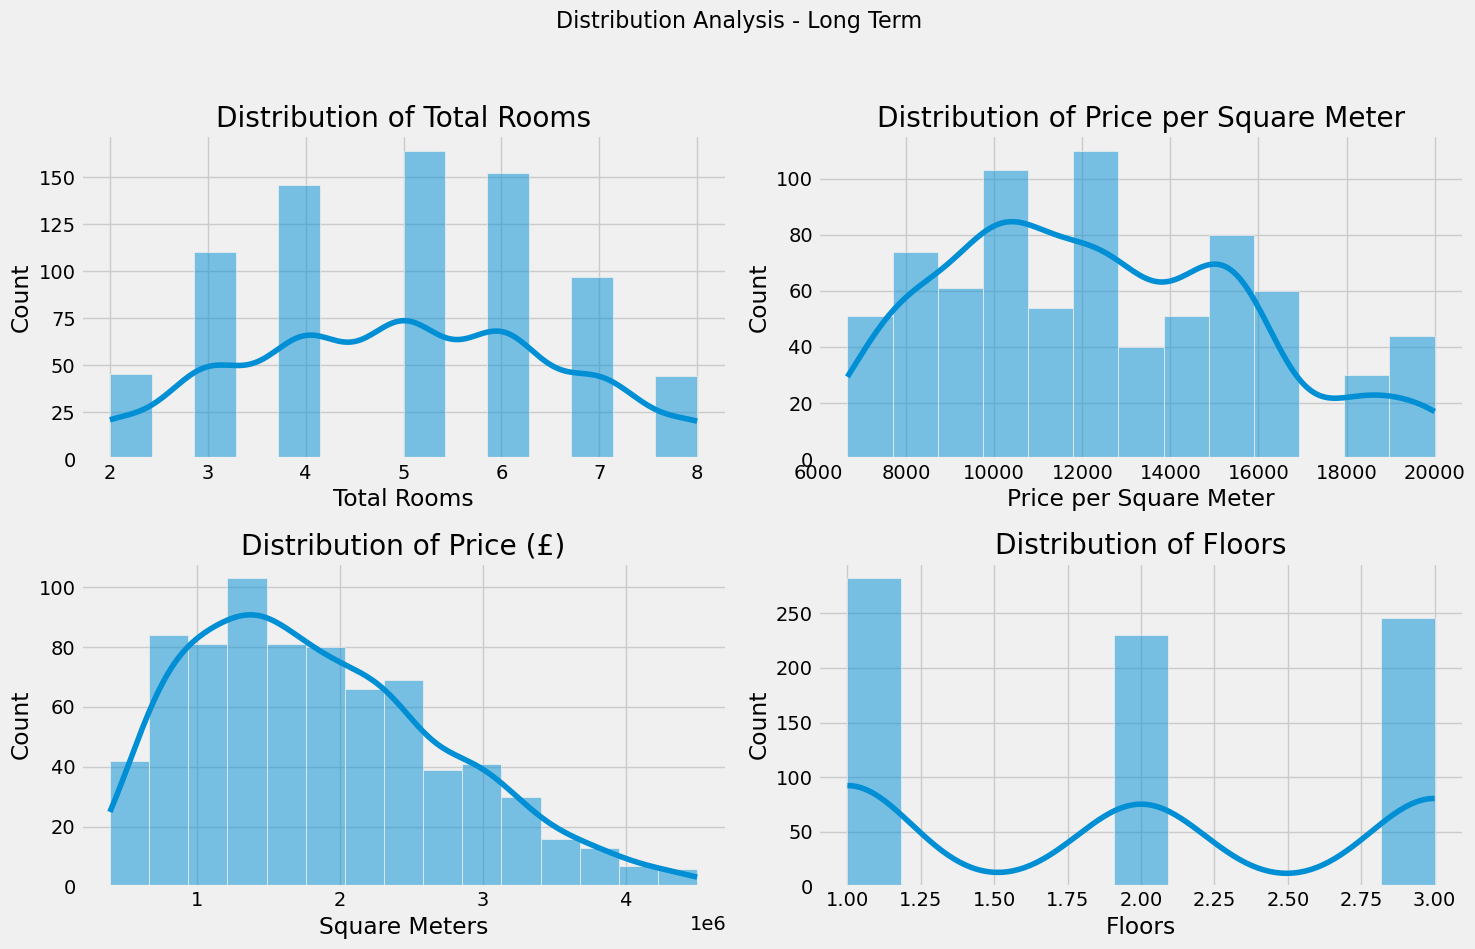

In [79]:
def create_distribution_plots(data, timeframe):

    plt.figure(figsize=(15, 10))
    plt.suptitle(f'Distribution Analysis - {timeframe}', fontsize=16)

    plt.subplot(2, 2, 1)
    sns.histplot(data['Total Rooms'], kde=True)
    plt.title('Distribution of Total Rooms')

    plt.subplot(2, 2, 2)
    sns.histplot(data['Price per Square Meter'], kde=True)
    plt.title('Distribution of Price per Square Meter')

    plt.subplot(2, 2, 3)
    sns.histplot(data['Price (£)'], kde=True)
    plt.title('Distribution of Price (£)')
    plt.xlabel('Square Meters')

    plt.subplot(2, 2, 4)
    sns.histplot(data['Floors'], kde=True)
    plt.title('Distribution of Floors')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

long_term_data = df[df['Age of Property']<=2000]
short_term_data = df[df['Age of Property']>2000]

create_distribution_plots(short_term_data, 'Short Term')
create_distribution_plots(long_term_data, 'Long Term')

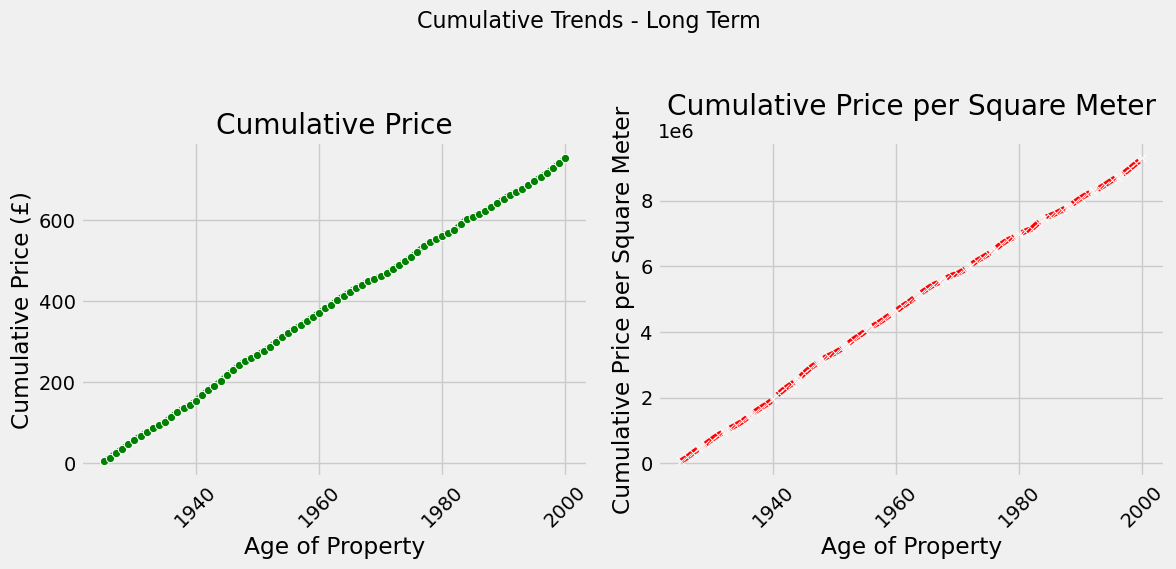

In [81]:
def create_cumulative_plots(data, timeframe, time_col='Age of Property'):
    data[time_col] = pd.Categorical(data[time_col], categories=range(1, 2001), ordered=True)
    plt.figure(figsize=(12, 6))
    plt.suptitle(f'Cumulative Trends - {timeframe}', fontsize=16)
    plt.subplot(1, 2, 1)

    data['Price (£)'] = 1
    cumulative_price = data.sort_values(by=time_col)['Price (£)'].cumsum()
    sns.lineplot(x=data[time_col], y=cumulative_price, marker='o', linestyle='-', color='green')
    plt.title('Cumulative Price')
    plt.xlabel('Age of Property')
    plt.ylabel('Cumulative Price (£)')
    plt.xticks(rotation=45)

    plt.subplot(1, 2, 2)
    data['Price per Square Meter'] = data['Price per Square Meter']
    cumulative_price_per_sq_m = data.sort_values(by=time_col)['Price per Square Meter'].cumsum()
    sns.lineplot(x=data[time_col], y=cumulative_price_per_sq_m, marker='x', linestyle='--', color='red')
    plt.title('Cumulative Price per Square Meter')
    plt.xlabel('Age of Property')
    plt.ylabel('Cumulative Price per Square Meter')
    plt.xticks(rotation=45)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

create_cumulative_plots(long_term_data, 'Long Term')

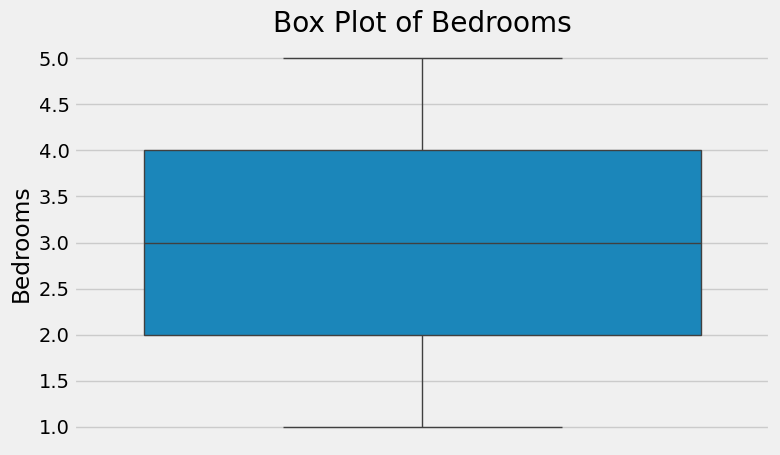

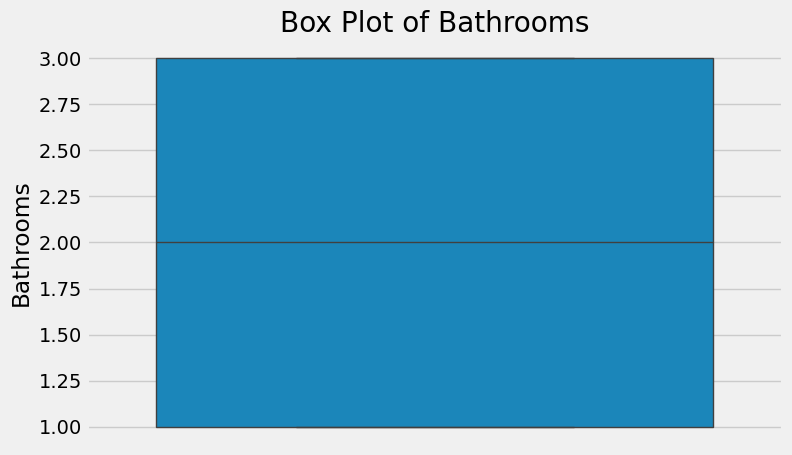

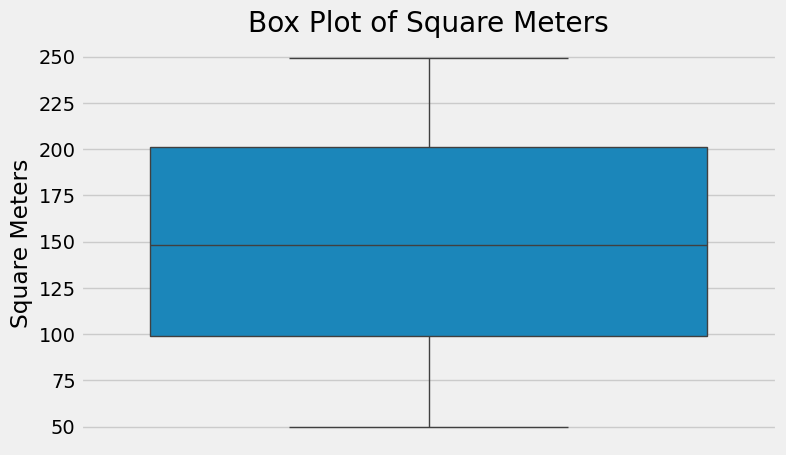

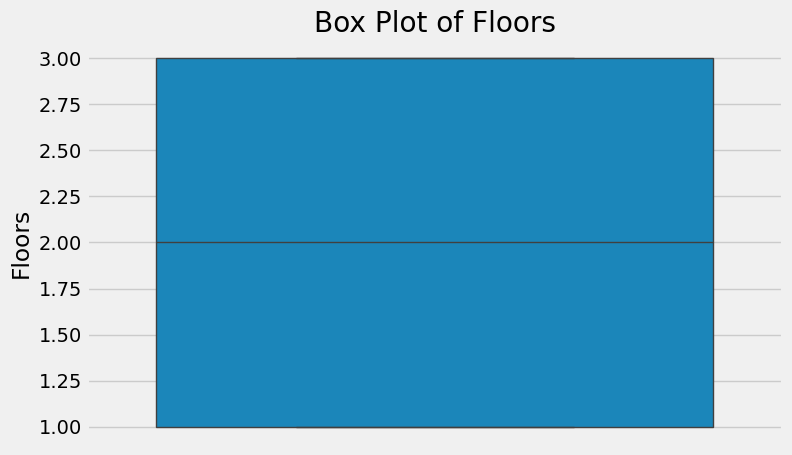

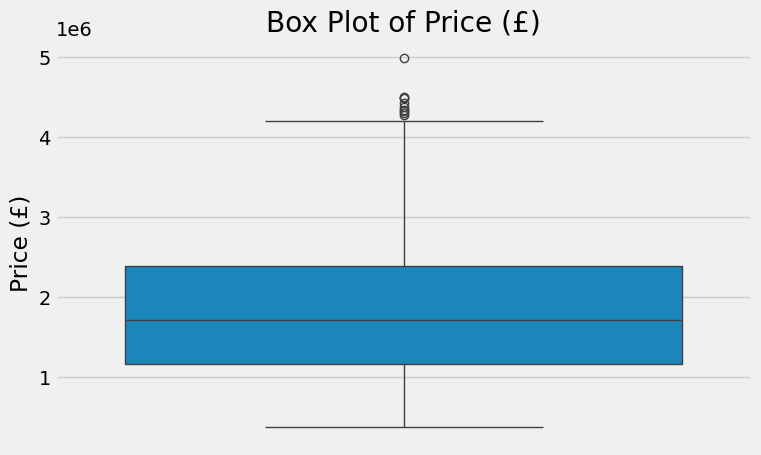

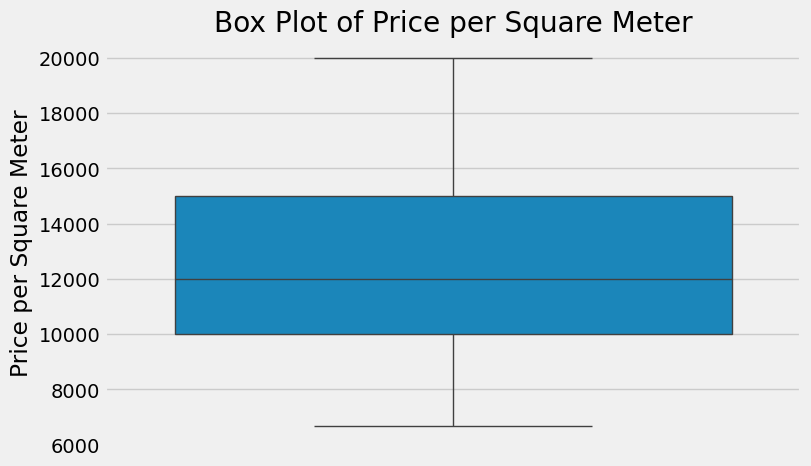

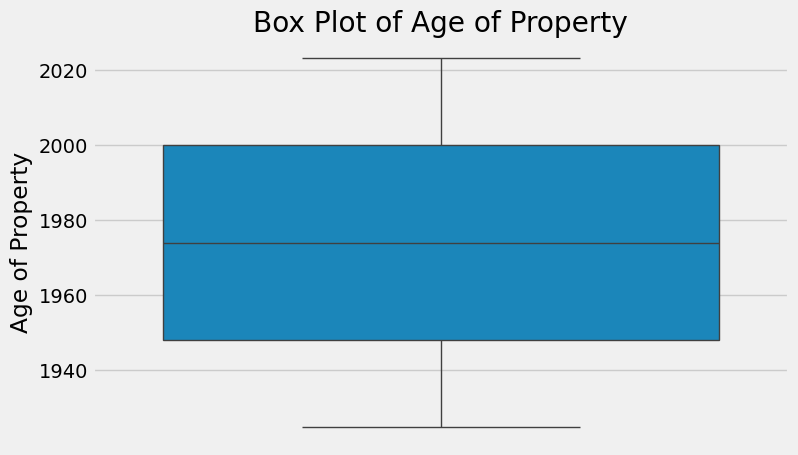

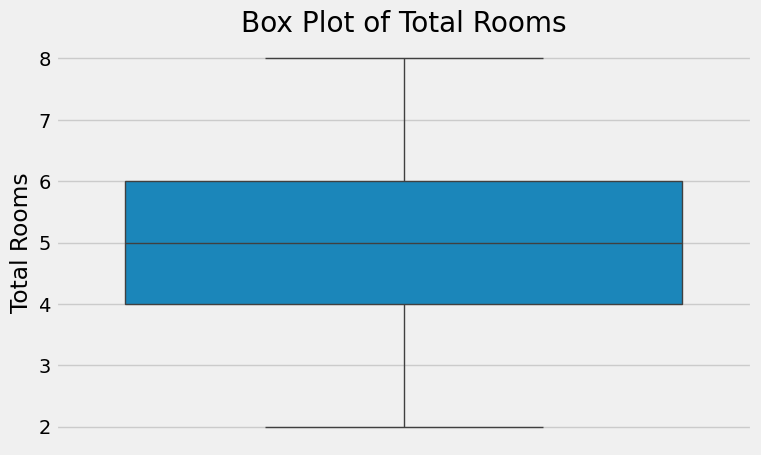

In [83]:
for col in num_cols:
  plt.figure(figsize=(8, 5))
  sns.boxplot(df[col])
  plt.title(f'Box Plot of {col}')
  plt.show()

In [85]:
df['Price (£)']=np.log1p(df['Price (£)'])

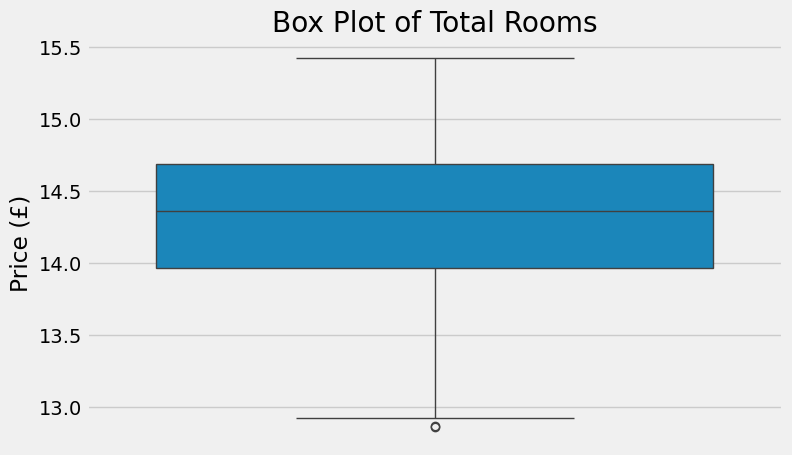

In [87]:
plt.figure(figsize=(8, 5))
sns.boxplot(df['Price (£)'])
plt.title(f'Box Plot of {col}')
plt.show()

In [91]:
df['Address'].value_counts()

Address
Fleet Street          122
King's Road           109
Bond Street           108
Strand                101
Piccadilly Circus      98
Oxford Street          96
Regent Street          92
Baker Street           92
Park Lane              92
Camden High Street     90
Name: count, dtype: int64

In [93]:
df.head()

,Address,Neighborhood,Bedrooms,Bathrooms,Square Meters,Garden,Garage,Floors,Property Type,Heating Type,Balcony,Interior Style,View,Materials,Building Status,Price (£),Price per Square Meter,Age of Property,Total Rooms
0,Regent Street,Notting Hill,2,3,179,No,No,3,Semi-Detached,Electric Heating,High-level Balcony,Industrial,Garden,Marble,Renovated,14.644587,12800,1952,5
1,Oxford Street,Westminster,2,1,123,Yes,No,1,Apartment,Central Heating,High-level Balcony,Industrial,City,Laminate Flooring,Old,14.204847,12000,1990,3
2,Regent Street,Soho,5,3,168,No,Yes,3,Semi-Detached,Central Heating,No Balcony,Industrial,Street,Wood,Renovated,14.447634,11200,1986,8
3,Piccadilly Circus,Islington,5,1,237,Yes,Yes,1,Apartment,Underfloor Heating,No Balcony,Classic,Park,Granite,Renovated,14.455257,8000,1971,6
4,Fleet Street,Marylebone,4,1,127,No,Yes,2,Semi-Detached,Central Heating,No Balcony,Modern,Park,Wood,Old,14.236850,12000,2001,5


In [95]:
hot_cols = ['Address','Neighborhood','Property Type','Heating Type','Interior Style','View','Materials']
df = pd.get_dummies(df, columns=hot_cols, dtype=int)

In [97]:
label_cols = ['Garden','Garage','Building Status','Balcony']
le=LabelEncoder()
for col in label_cols:
  df[col] = le.fit_transform(df[col])

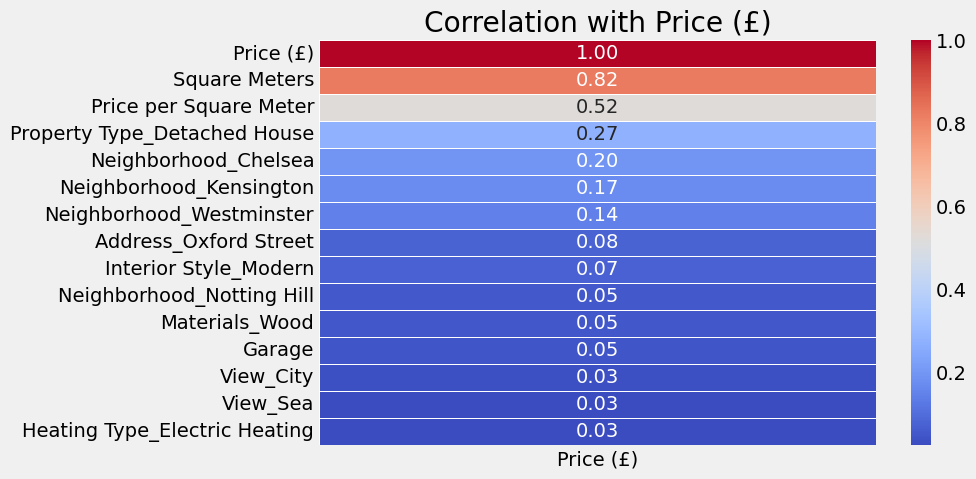

In [99]:
correlation_matrix = df.corr(numeric_only=True)
correlation_price = correlation_matrix['Price (£)'].sort_values(ascending=False).head(15)
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_price.to_frame(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation with Price (£)')
plt.show()

In [101]:
top_correlated_columns = correlation_matrix['Price (£)'].sort_values(ascending=False).head(15).index
X_selected = df[top_correlated_columns.drop('Price (£)', errors='ignore')]
Y=df['Price (£)']

In [103]:
X_train , X_test , y_train , y_test = train_test_split(X_selected , Y , test_size=0.2 , random_state=42)

In [105]:
model1 = LinearRegression()
model1.fit(X_train , y_train)

LinearRegression()

In [107]:
y_pred1 = model1.predict(X_test)

In [109]:
model2 = DecisionTreeRegressor()
model2.fit(X_train , y_train)

DecisionTreeRegressor()

In [111]:
y_pred2 = model2.predict(X_test)

In [113]:
model3 = RandomForestRegressor()
model3.fit(X_train , y_train)

RandomForestRegressor()

In [115]:
y_pred3 = model3.predict(X_test)

In [117]:
model4 = HistGradientBoostingRegressor()
model4.fit(X_train, y_train)

HistGradientBoostingRegressor()

In [119]:
y_pred4 = model4.predict(X_test)

In [121]:
model5 = KNeighborsRegressor()
model5.fit(X_train , y_train)

KNeighborsRegressor()

In [123]:
y_pred5 = model5.predict(X_test)

In [125]:
def evaluate_model(y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, r2

for model in [model1, model2, model3, model4, model5]:
    y_pred = model.predict(X_test)
    mse, r2 = evaluate_model(y_test, y_pred)
    print(f"{model.__class__.__name__}")
    print(f"MSE: {mse}")
    print(f"R2 Score: {r2 * 100:.2f}%"+'\n')

LinearRegression
MSE: 0.008274127362390814
R2 Score: 96.88%

DecisionTreeRegressor
MSE: 0.0024724207786211874
R2 Score: 99.07%

RandomForestRegressor
MSE: 0.0006372579514418203
R2 Score: 99.76%

HistGradientBoostingRegressor
MSE: 0.0005310567366128417
R2 Score: 99.80%

KNeighborsRegressor
MSE: 0.007111282700833954
R2 Score: 97.32%



In [127]:
results = []
for model in [model1, model2, model3, model4, model5]:

    train_mse, train_r2 = evaluate_model(y_train, model.predict(X_train))
    test_mse, test_r2 = evaluate_model(y_test, model.predict(X_test))

    results.append({
        'Model': model.__class__.__name__,
        'Train Score %': round(train_r2*100,2),
        'Test Score %': round(test_r2*100,2) })

results_df = pd.DataFrame(results)
display(results_df)

,Model,Train Score %,Test Score %
0,LinearRegression,96.62,96.88
1,DecisionTreeRegressor,100.00,99.07
2,RandomForestRegressor,99.96,99.76
3,HistGradientBoostingRegressor,99.93,99.80
4,KNeighborsRegressor,98.98,97.32


In [129]:
model_lasso = Lasso()
model_lasso.fit(X_train , y_train)

Lasso()

In [131]:
model_Ridge = Ridge()
model_Ridge.fit(X_train , y_train)

Ridge()

In [133]:
for model in [model_Ridge, model_lasso]:
    y_pred = model.predict(X_test)
    mse, r2 = evaluate_model(y_test, y_pred)
    print(f"{model.__class__.__name__}")
    print(f"MSE: {mse}")
    print(f"R2 Score: {r2 * 100:.2f}%"+'\n')

Ridge
MSE: 0.008289700988642998
R2 Score: 96.87%

Lasso
MSE: 0.008795650289821964
R2 Score: 96.68%

